In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

In [6]:
# Load data
        
#timeslices = [2, 4, 8, 10]
timeslices = [2, 4,6, 8]

cy_grape_fid_error = []
pulseoptim_fid_error = []
pop_fid_error = []

for n_ts in timeslices:
    with h5py.File(f"RND_qutip_opt_results_timeslices_{n_ts}.hdf5", 'r') as f:
        pulseoptim_fid_error.append(
            f["pulseoptim_fid_error"][...]
        )
        cy_grape_fid_error.append(
            f["cy_grape_fid_error"][...]
        )

    with h5py.File(f"results_{n_ts}.hdf5", 'r') as f:
        pop_fid_error.append(1 - f['f_PSU'][...]
                            )

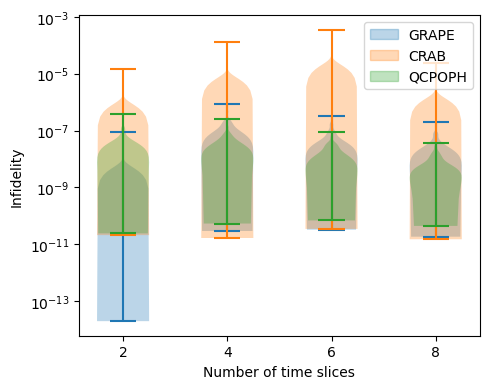

In [7]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5, 4))

labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

# GRAPE
add_label(plt.violinplot([np.abs(_)  for _ in cy_grape_fid_error]), "GRAPE")    

add_label(plt.violinplot([np.abs(_)  for _ in pulseoptim_fid_error]), "CRAB")

add_label(plt.violinplot([np.abs(_) for _ in pop_fid_error]), "QCPOPH")

plt.yscale('log')

plt.xticks(range(1, len(timeslices) + 1), timeslices )
plt.xlabel("Number of time slices")

plt.ylabel("Infidelity")

plt.legend(*zip(*labels), loc=1)

plt.tight_layout()

plt.savefig("Fig_grape_crab_vs_pop_piecewise_RND.pdf")

plt.show()